# <span style="color:#1A1A19">Sugarcane Production (EDA)</span>

<center><img src = "https://cdn.pixabay.com/photo/2020/03/30/00/09/sugar-4982660_960_720.jpg"></center>

## Table Of Contents -
### 1. *Importing necessary libraries* 
### 2. *Data Cleaning*
### 3. *Univariate Analysis* 
### 4. *Bivariate Analysis*
### 5. *Correlation Analysis*
### 6. *Analysis by Continent*

## <span style="color:#31511E">1. Importing Libraries</span>

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"C:\Users\Mohit\Desktop\Data Analysis Projects\Csv files\List of Countries by Sugarcane Production.csv")

In [4]:
df.shape

(103, 7)

In [5]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


## <span style="color:#31511E">2. Data Cleaning</span>

In [6]:
# Remove dots in the 'Production (Tons)' column
df["Production (Tons)"] = df["Production (Tons)"].str.replace(".","")

# Remove dots and replace commas with dots in 'Production per Person (Kg)' column
df["Production per Person (Kg)"] = df["Production per Person (Kg)"].str.replace(".","").str.replace(",", ".")

# Remove dots in the 'Acreage (Hectare)' column
df["Acreage (Hectare)"] = df["Acreage (Hectare)"].str.replace(".","")

# Remove dots and replace commas with dots in 'Yield (Kg / Hectare)' column
df["Yield (Kg / Hectare)"]= df["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",", ".")

In [7]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [8]:
df = df.drop( "Unnamed: 0", axis = 1)

In [9]:
df.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [10]:
#remove unnecessary spaces
df.rename(columns= {"Production (Tons)": "Production(Tons)"}, inplace = True)
df.rename(columns= {"Production per Person (Kg)": "Production_per_person(Kg)"}, inplace = True)
df.rename(columns= {"Acreage (Hectare)": "Acreage(Hectare)"}, inplace = True)
df.rename(columns= {"Yield (Kg / Hectare)": "Yield(Kg/Hectare)"}, inplace = True)

In [11]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [12]:
#check for null values 
df.isna().sum()

Country                      0
Continent                    0
Production(Tons)             0
Production_per_person(Kg)    0
Acreage(Hectare)             1
Yield(Kg/Hectare)            1
dtype: int64

In [13]:
#null values in a particular column
df["Acreage(Hectare)"].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
98     False
99      True
100    False
101    False
102    False
Name: Acreage(Hectare), Length: 103, dtype: bool

In [14]:
#to get the dataframe
df[df["Acreage(Hectare)"].isnull()]

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
99,Djibouti,Africa,53,51,NaN,NaN


In [15]:
# Remove rows with any NaN values, reset the index, and drop the old index column
df = df.dropna().reset_index().drop("index", axis = 1)

In [16]:
df

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...
97,Spain,Europe,394,8,9,43596.5
98,Lebanon,Asia,97,16,3,28386.4
99,Singapore,Asia,50,9,2,25
100,Samoa,Oceania,12,6,1,11949.8


In [17]:
df.nunique()

Country                      102
Continent                      6
Production(Tons)             102
Production_per_person(Kg)    101
Acreage(Hectare)             101
Yield(Kg/Hectare)            102
dtype: int64

In [18]:
#a check on data types
df.dtypes

Country                      object
Continent                    object
Production(Tons)             object
Production_per_person(Kg)    object
Acreage(Hectare)             object
Yield(Kg/Hectare)            object
dtype: object

In [19]:
#Convert column from object to float type
df["Production(Tons)"] = df["Production(Tons)"].astype(float)
df["Production_per_person(Kg)"] = df["Production_per_person(Kg)"].astype(float)
df["Acreage(Hectare)"] = df["Acreage(Hectare)"].astype(float)
df["Yield(Kg/Hectare)"] = df["Yield(Kg/Hectare)"].astype(float)

In [20]:
df.dtypes

Country                       object
Continent                     object
Production(Tons)             float64
Production_per_person(Kg)    float64
Acreage(Hectare)             float64
Yield(Kg/Hectare)            float64
dtype: object

## <span style="color:#31511E">3. Univariate Analysis</span>

In [21]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


### <span style="color:#859F3D">1. How many countries produce sugarcane from each continent?</span>

In [22]:
continent_counts = df["Continent"].value_counts()

In [23]:
continent_counts 

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

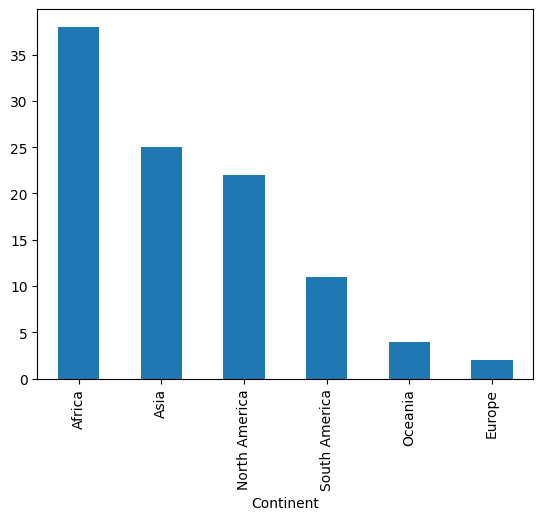

In [24]:
#without using seaborn library
continent_counts.plot(kind = "bar")

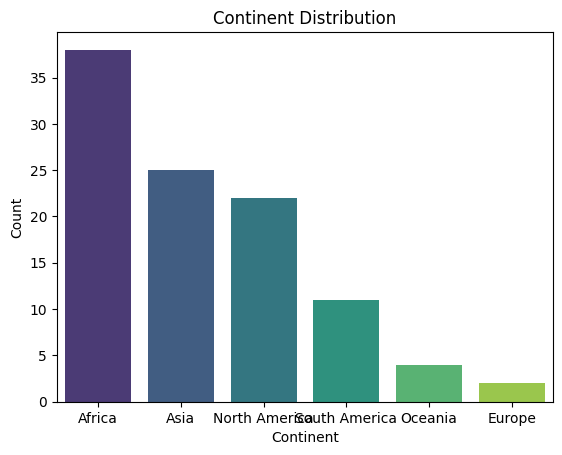

In [25]:
#Using seaborn library 

#Count the occurrences of each continent and convert it to a DataFrame 
continent_counts = df["Continent"].value_counts().reset_index() 
continent_counts.columns = ['Continent', 'Count']

# Create the bar plot using Seaborn 
sns.barplot(x='Continent', y='Count', data=continent_counts , palette='viridis')

# Set the labels and title 
plt.xlabel('Continent') 
plt.ylabel('Count') 
plt.title('Continent Distribution')

# Show the plot 
plt.show()

### Answer - Africa has maximum number of countries which produces sugarcane.

In [26]:
df.describe()

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


### <span style="color:#31511E">Checking outliers</span>

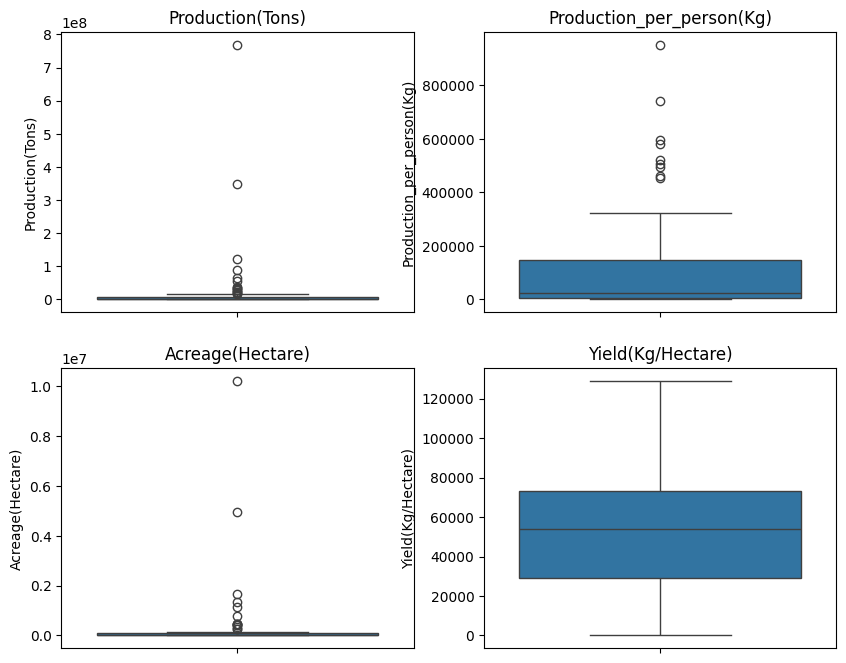

In [27]:
# Set the overall size of the figure
plt.figure(figsize=(10, 8))

# Create the first subplot (1st row, 1st column) for 'Production(Tons)'
plt.subplot(2, 2, 1)
sns.boxplot(df["Production(Tons)"])
plt.title("Production(Tons)")

# Create the second subplot (1st row, 2nd column) for 'Production_per_person(Kg)'
plt.subplot(2, 2, 2)
sns.boxplot(df["Production_per_person(Kg)"])
plt.title("Production_per_person(Kg)")

# Create the third subplot (2nd row, 1st column) for 'Acreage(Hectare)'
plt.subplot(2, 2, 3)
sns.boxplot(df["Acreage(Hectare)"])
plt.title("Acreage(Hectare)")

# Create the fourth subplot (2nd row, 2nd column) for 'Yield(Kg/Hectare)'
plt.subplot(2, 2, 4)
sns.boxplot(df["Yield(Kg/Hectare)"])
plt.title("Yield(Kg/Hectare)")

# Display the plot
plt.show()

### Conclusion 
*We have outliers in the data but outliers are required here as it shows the countries which has maximum production. And then we can see what are the reasons for outliers.*

### <span style="color:#436850">Distribution of the columns</span>

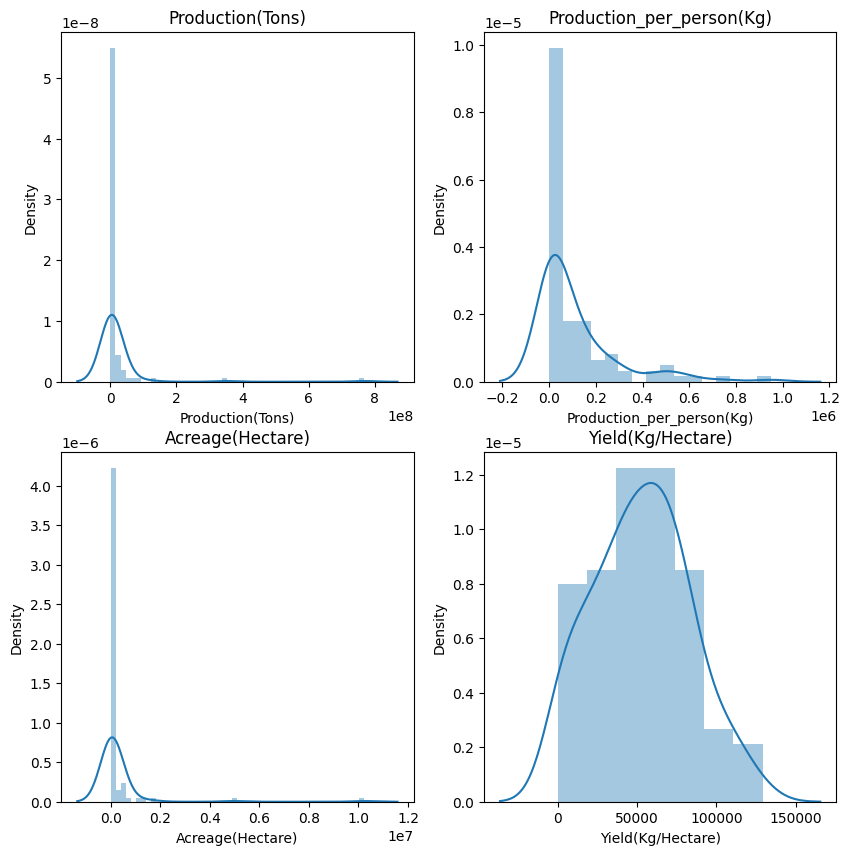

In [28]:
# Set the overall size of the figure
plt.figure(figsize=(10, 10))

# Create the first subplot (1st row, 1st column) for 'Production(Tons)' distribution
plt.subplot(2, 2, 1)
sns.distplot(df["Production(Tons)"])
plt.title("Production(Tons)")

# Create the second subplot (1st row, 2nd column) for 'Production_per_person(Kg)' distribution
plt.subplot(2, 2, 2)
sns.distplot(df["Production_per_person(Kg)"])
plt.title("Production_per_person(Kg)")

# Create the third subplot (2nd row, 1st column) for 'Acreage(Hectare)' distribution
plt.subplot(2, 2, 3)
sns.distplot(df["Acreage(Hectare)"])
plt.title("Acreage(Hectare)")

# Create the fourth subplot (2nd row, 2nd column) for 'Yield(Kg/Hectare)' distribution
plt.subplot(2, 2, 4)
sns.distplot(df["Yield(Kg/Hectare)"])
plt.title("Yield(Kg/Hectare)")

# Display all the plots
plt.show()

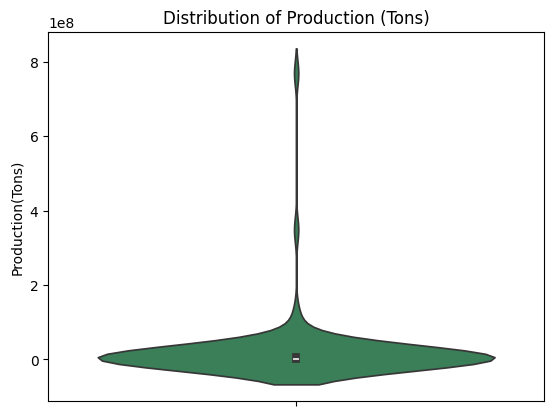

In [29]:
# To show the distribution and density of the "Production(Tons)"
sns.violinplot(df["Production(Tons)"], color='seagreen')

# Set the title of the plot
plt.title("Distribution of Production (Tons)")

# Display the plot
plt.show()


## <span style="color:#31511E">4. Bivariate Analysis</span>

In [42]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


### <span style="color:#859F3D">2. Which country produces maximum sugarcane?</span>

In [43]:
df_new = df[["Country","Production(Tons)"]].set_index("Country")

In [44]:
df_new

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Spain,394.0
Lebanon,97.0
Singapore,50.0


In [45]:
df_new["Production(Tons)_percent"] = df_new["Production(Tons)"]*100/df_new["Production(Tons)"].sum()

In [46]:
df_new

,Production(Tons),Production(Tons)_percent
Country,,
Brazil,768678382.0,4.072729e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Spain,394.0,2.087551e-05
Lebanon,97.0,5.139401e-06
Singapore,50.0,2.649176e-06


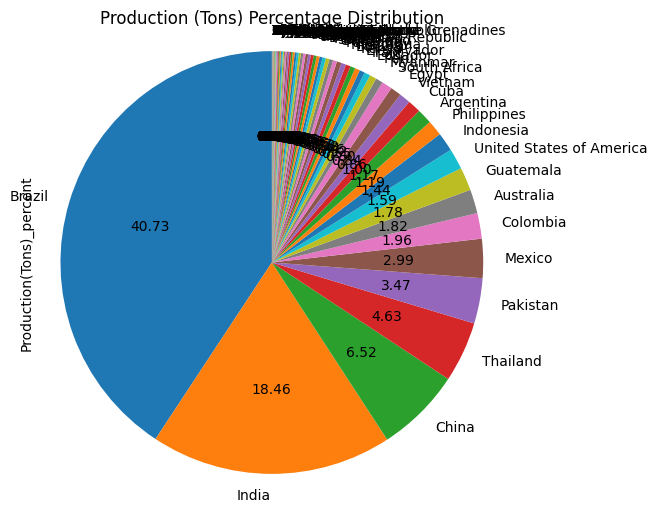

In [47]:
# Create a pie chart for the 'Production(Tons)_percent' column
df_new["Production(Tons)_percent"].plot(kind='pie', autopct='%.2f', figsize=(6, 6), startangle=90)

# Set the title of the plot
plt.title("Production (Tons) Percentage Distribution")

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the plot
plt.show()

### Answer - Brazil, India and China produce 65% of sugarcane.

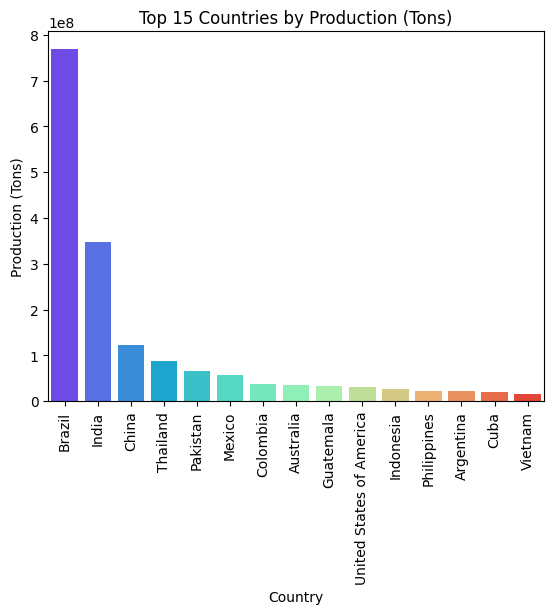

In [48]:
# Create a bar plot using the top 15 countries based on 'Production(Tons)'
ax = sns.barplot(data=df.head(15), x="Country", y="Production(Tons)", palette="rainbow")

# Rotate the x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Set the title of the plot
plt.title("Top 15 Countries by Production (Tons)")

# Add labels to the axes
plt.xlabel("Country")
plt.ylabel("Production (Tons)")

# Display the plot
plt.show()

### Answer : The country "Brazil" produces maximum sugarcane out of all countries.

### <span style="color:#859F3D">3. Which country has highest land? ?</span>

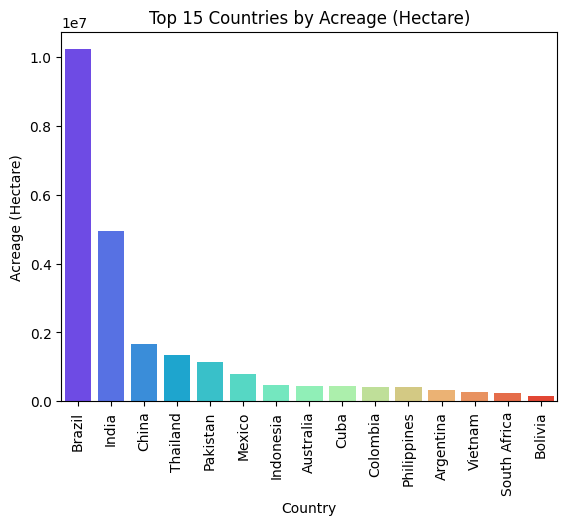

In [49]:
# Sort the DataFrame by 'Acreage(Hectare)' in descending order and select the top 15 entries
df_acr = df.sort_values("Acreage(Hectare)", ascending=False).head(15)

# Create a bar plot with a rainbow color palette
ax = sns.barplot(data=df_acr, x="Country", y="Acreage(Hectare)", palette="rainbow")

# Rotate the x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Set the title of the plot
plt.title("Top 15 Countries by Acreage (Hectare)")

# Add labels to the axes
plt.xlabel("Country")
plt.ylabel("Acreage (Hectare)")

# Display the plot
plt.show()

### Answer : Brazil covers the highest land.  

### <span style="color:#859F3D">4. Which country has highest yield per hectare?</span>

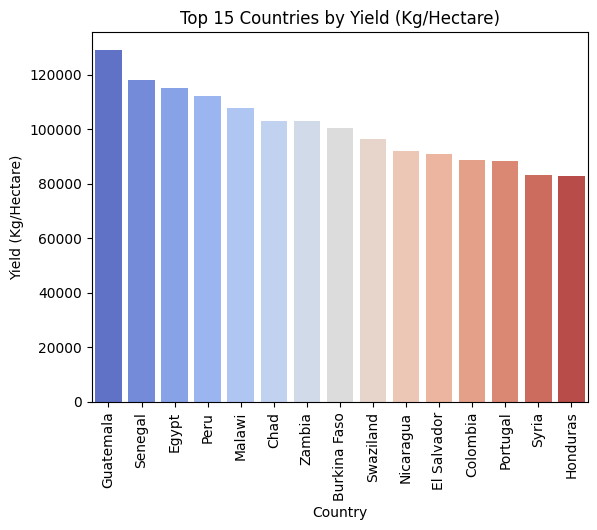

In [50]:
# Sort the DataFrame by 'Yield(Kg/Hectare)' in descending order and select the top 15 entries
df_yield = df.sort_values("Yield(Kg/Hectare)", ascending=False).head(15)

# Create a bar plot using Seaborn with a custom color palette
ax = sns.barplot(data=df_yield, x="Country", y="Yield(Kg/Hectare)", palette="coolwarm")

# Rotate the x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Set the title of the plot
plt.title("Top 15 Countries by Yield (Kg/Hectare)")

# Add labels to the axes
plt.xlabel("Country")
plt.ylabel("Yield (Kg/Hectare)")

# Display the plot
plt.show()

### Answer : Guatemala has the highest yield(kg/hectare)

### <span style="color:#859F3D">5. Which country has highest production?</span>

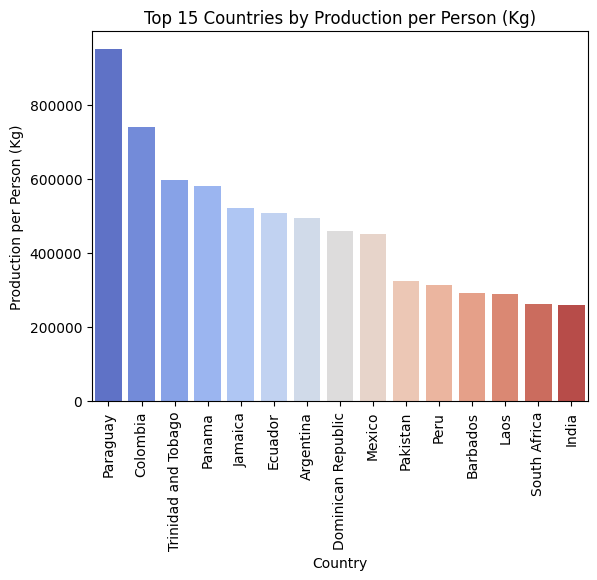

In [51]:
# Sort the DataFrame by 'Production_per_person(Kg)' in descending order and select the top 15 entries
df_yield = df.sort_values("Production_per_person(Kg)", ascending=False).head(15)

# Create a bar plot using Seaborn with a custom color palette
ax = sns.barplot(data=df_yield, x="Country", y="Production_per_person(Kg)", palette="coolwarm")

# Rotate the x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Set the title of the plot
plt.title("Top 15 Countries by Production per Person (Kg)")

# Add labels to the axes
plt.xlabel("Country")
plt.ylabel("Production per Person (Kg)")

# Display the plot
plt.show()

### Answer : Production per Person is highest in Paraguay.

## <span style="color:#31511E">5. Correlation Analysis</span>

In [52]:
df.dtypes

Country                       object
Continent                     object
Production(Tons)             float64
Production_per_person(Kg)    float64
Acreage(Hectare)             float64
Yield(Kg/Hectare)            float64
dtype: object

In [53]:
# Filter only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

In [54]:
numeric_df.dtypes

Production(Tons)             float64
Production_per_person(Kg)    float64
Acreage(Hectare)             float64
Yield(Kg/Hectare)            float64
dtype: object

In [55]:
numeric_df.corr

<bound method DataFrame.corr of      Production(Tons)  Production_per_person(Kg)  Acreage(Hectare)  \
0         768678382.0                   3668.531        10226205.0   
1         348448000.0                 260721.000         4950000.0   
2         123059739.0                  88287.000         1675215.0   
3          87468496.0                   1264.303         1336575.0   
4          65450704.0                 324219.000         1130820.0   
..                ...                        ...               ...   
97              394.0                      8.000               9.0   
98               97.0                     16.000               3.0   
99               50.0                      9.000               2.0   
100              12.0                      6.000               1.0   
101               1.0                      0.000               0.0   

     Yield(Kg/Hectare)  
0              75167.5  
1              70393.5  
2              73459.1  
3              65442.2  
4 

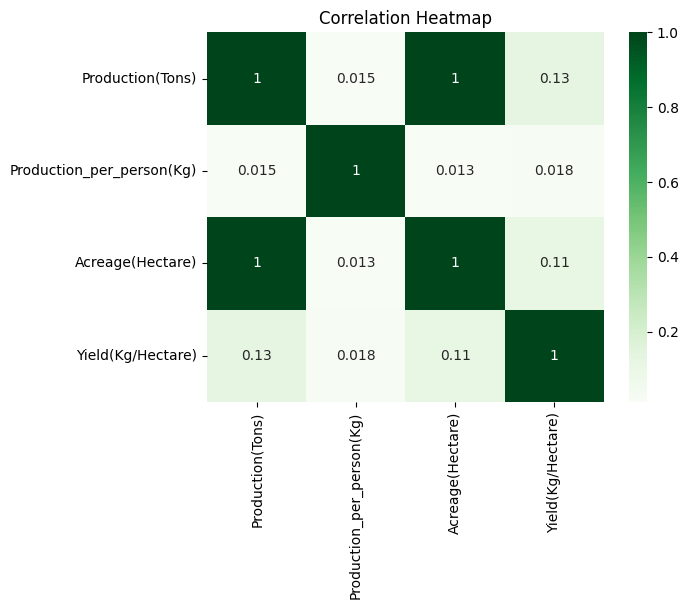

In [56]:
# Create a heatmap with the filtered numeric DataFrame
sns.heatmap(numeric_df.corr(), annot=True, cmap="Greens")

# title of the heatmap for better context
plt.title("Correlation Heatmap")

# Display the heatmap
plt.show()


### <span style="color:#859F3D">5. Do countries with highest land produce more sugarcane?</span>

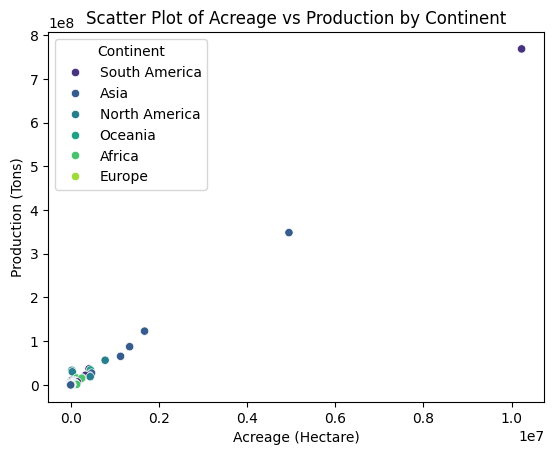

In [57]:
# Create a scatter plot with hue based on the 'Continent' column
sns.scatterplot(data=df, x="Acreage(Hectare)", y="Production(Tons)", hue="Continent", palette="viridis")

# Set the title of the plot
plt.title("Scatter Plot of Acreage vs Production by Continent")

# Add labels to the axes
plt.xlabel("Acreage (Hectare)")
plt.ylabel("Production (Tons)")

# Display the plot
plt.show()

### Answer : Overall increase in land increases the production.

### <span style="color:#859F3D">6. Do countries which yield more sugarcane per hectare produces more sugarcane in total?</span>

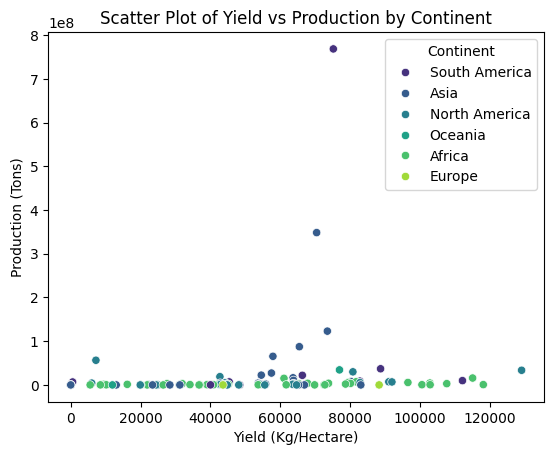

In [58]:
# Create a scatter plot using Seaborn with 'Yield(Kg/Hectare)' on the x-axis and 'Production(Tons)' on the y-axis
ax = sns.scatterplot(data=df, x="Yield(Kg/Hectare)", y="Production(Tons)", hue="Continent", palette="viridis")

# Set the title of the plot
plt.title("Scatter Plot of Yield vs Production by Continent")

# Add labels to the axes
plt.xlabel("Yield (Kg/Hectare)")
plt.ylabel("Production (Tons)")

# Add a legend to the plot
plt.legend(title="Continent")

# Display the plot
plt.show()

### Answer : Overall it's true that countries which yield more sugarcane per hectare also produce more sugarcane in total.

In [59]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


## <span style="color:#31511E">6. Analysis for Continent</span>

In [60]:
df_continent = df.groupby("Continent").sum()

In [61]:
df_continent["number_of_countries"] = df.groupby("Continent").count()["Country"]

In [62]:
df_continent

,Country,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare),number_of_countries
Continent,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9,2
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1,4
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7,11


### <span style="color:#859F3D">7. Which continent produces maximum sugarcane?</span>

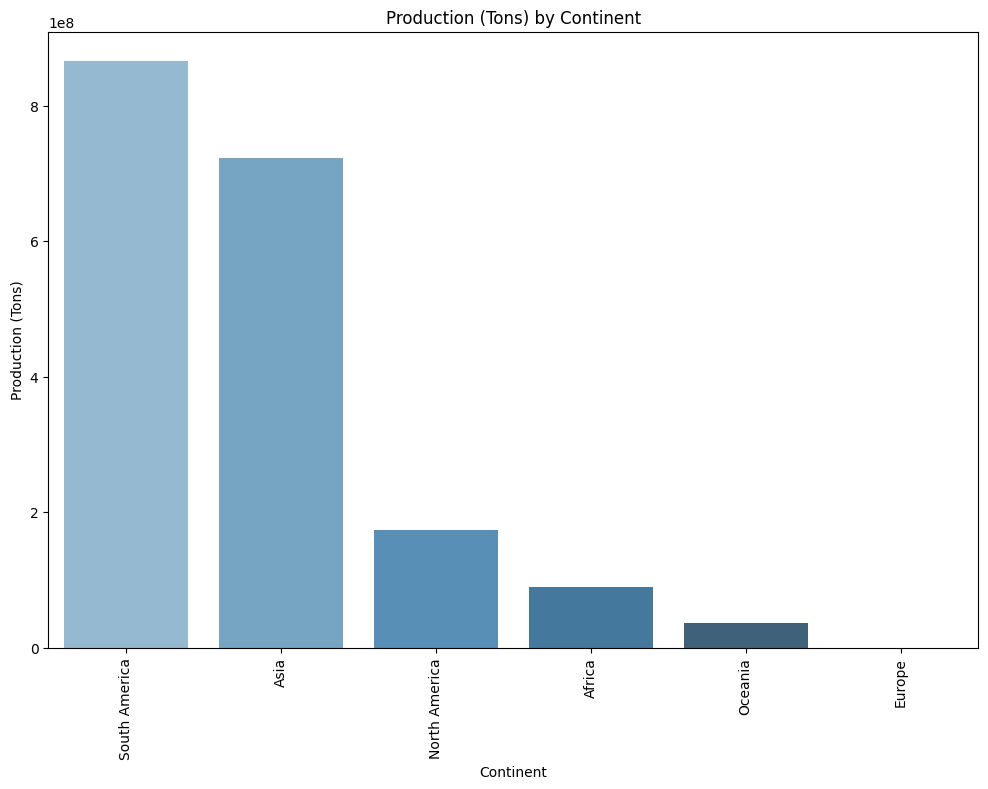

In [63]:
# Sort the 'Production(Tons)' column in descending order
df_continent_sorted = df_continent.sort_values("Production(Tons)", ascending=False)

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 8))  # Set the figure size
ax = sns.barplot(data=df_continent_sorted, x=df_continent_sorted.index, y="Production(Tons)", palette="Blues_d")

# Rotate the x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Set the title of the plot
plt.title("Production (Tons) by Continent")

# Add labels to the axes
plt.xlabel("Continent")
plt.ylabel("Production (Tons)")

# Display the plot
plt.show()

### Answer : South America produces maximum sugarcane.

In [64]:
df["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

### <span style="color:#859F3D">8. Do number of countries in a Continent effects production of sugarcane?</span>

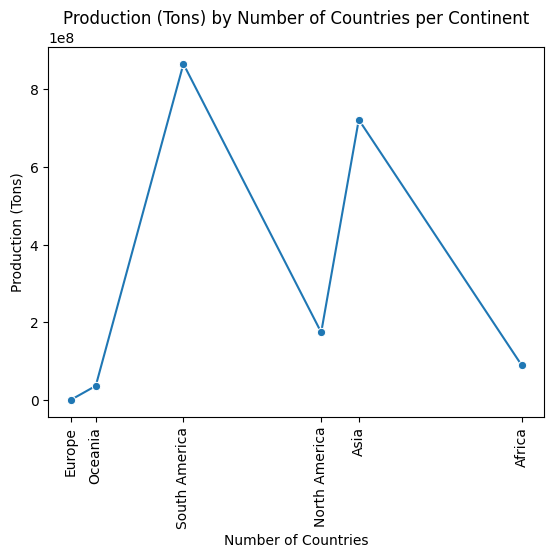

In [65]:
# Extract the continent names from the DataFrame index
continent_names = df_continent.index.to_list()

# Create a line plot using Seaborn
sns.lineplot(data=df_continent, x="number_of_countries", y="Production(Tons)", marker="o", palette="viridis")

# Set the x-axis labels using the continent names with a rotation for better readability
plt.xticks(ticks=df_continent["number_of_countries"], labels=continent_names, rotation=90)

# Set the title of the plot
plt.title("Production (Tons) by Number of Countries per Continent")

# Add labels to the axes
plt.xlabel("Number of Countries")
plt.ylabel("Production (Tons)")

# Display the plot
plt.show()

### Answer : There is no relation between no. of countries in a continent and production.

In [66]:
df.nunique()

Country                      102
Continent                      6
Production(Tons)             102
Production_per_person(Kg)    101
Acreage(Hectare)             101
Yield(Kg/Hectare)            102
dtype: int64

### <span style="color:#859F3D">9. Do continent with highest land produces more sugarcane?</span>

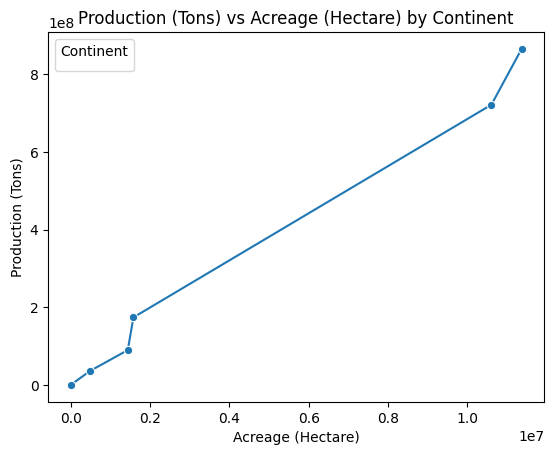

In [67]:
# Create a line plot using Seaborn with 'Acreage(Hectare)' on the x-axis and 'Production(Tons)' on the y-axis
ax = sns.lineplot(data=df_continent, x="Acreage(Hectare)", y="Production(Tons)", marker="o", palette="coolwarm")

# Set the title of the plot
plt.title("Production (Tons) vs Acreage (Hectare) by Continent")

# Add labels to the axes
plt.xlabel("Acreage (Hectare)")
plt.ylabel("Production (Tons)")

# Add a legend to the plot for the 'Continent' column
plt.legend(title="Continent")

# Display the plot
plt.show()


### Answwr : It's true that production(tons) depends on acreage(hectare).

### <span style="color:#31511E">Production Analysis distribution by continent</span>

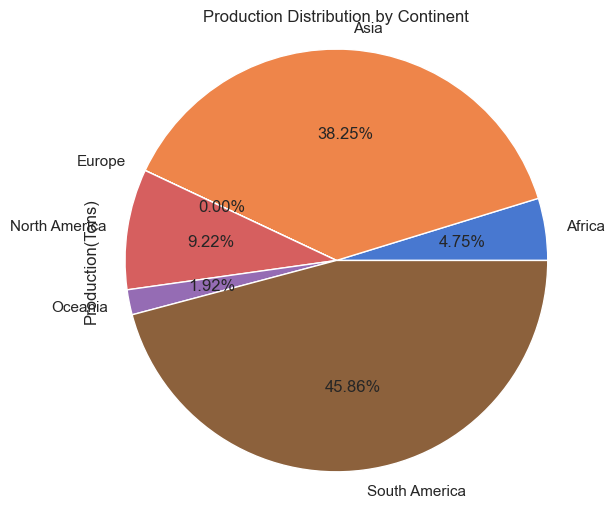

In [68]:
# Set the Seaborn style
sns.set(style="whitegrid")

# Create a pie chart for the 'Production(Tons)' column
plt.figure(figsize=(6, 6))  # Set the figure size
df_continent["Production(Tons)"].plot(kind="pie", autopct="%.2f%%", colors=sns.color_palette("muted"))

# Set the title of the plot
plt.title('Production Distribution by Continent')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the plot
plt.show()

# <span style="color:#31511E">Conclusion :</span>
###

*This analysis provides insights into sugarcane production across different countries and continents. It explores the relationship between various production-related metrics and uncovers patterns and trends within the dataset.*

complete project on GitHub : https://github.com/Mohitupadhyay-ds/Python_Data_Analysis

*Thank you!*